In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as xet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/NoPlatesLabels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/xml_files/Cars/1.xml,378,542,464,544
1,/content/drive/MyDrive/xml_files/Cars/10.xml,805,954,553,629
2,/content/drive/MyDrive/xml_files/Cars/100.xml,814,1114,964,1104
3,/content/drive/MyDrive/xml_files/Cars/101.xml,394,557,571,625
4,/content/drive/MyDrive/xml_files/Cars/102.xml,763,985,727,834


In [ ]:
filename=df['filepath'][0]
filename

'/content/drive/MyDrive/xml_files/Cars/1.xml'

In [ ]:
def getfilename(filename):
  filename_image=xet.parse(filename).getroot().find('filename').text
  filepath_image=os.path.join('/content/drive/My Drive/xml_files/Cars',filename_image)
  return filepath_image

In [ ]:
getfilename(filename)

'/content/drive/My Drive/xml_files/Cars/DSC_0968.JPG'

In [ ]:
image_path=list(df['filepath'].apply(getfilename))
image_path

['/content/drive/My Drive/xml_files/Cars/DSC_0968.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0979.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_1103.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_1104.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_1105.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_1106.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_1107.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0982.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0983.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0984.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0985.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0988.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0989.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0990.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0992.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0994.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_0969.JPG',
 '/content/drive/My Drive/xml_files/Cars/DSC_099

In [ ]:
a=image_path[0]
a

'/content/drive/My Drive/xml_files/Cars/DSC_0968.JPG'

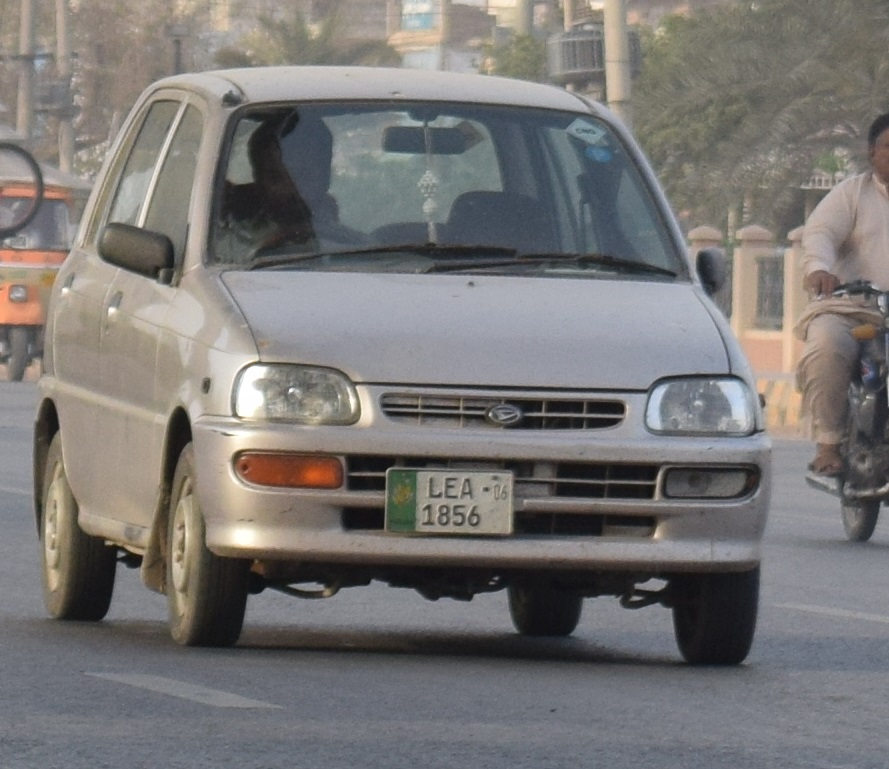

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread(a)

if img is not None:
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print(f"Error: Unable to load image from {a}")


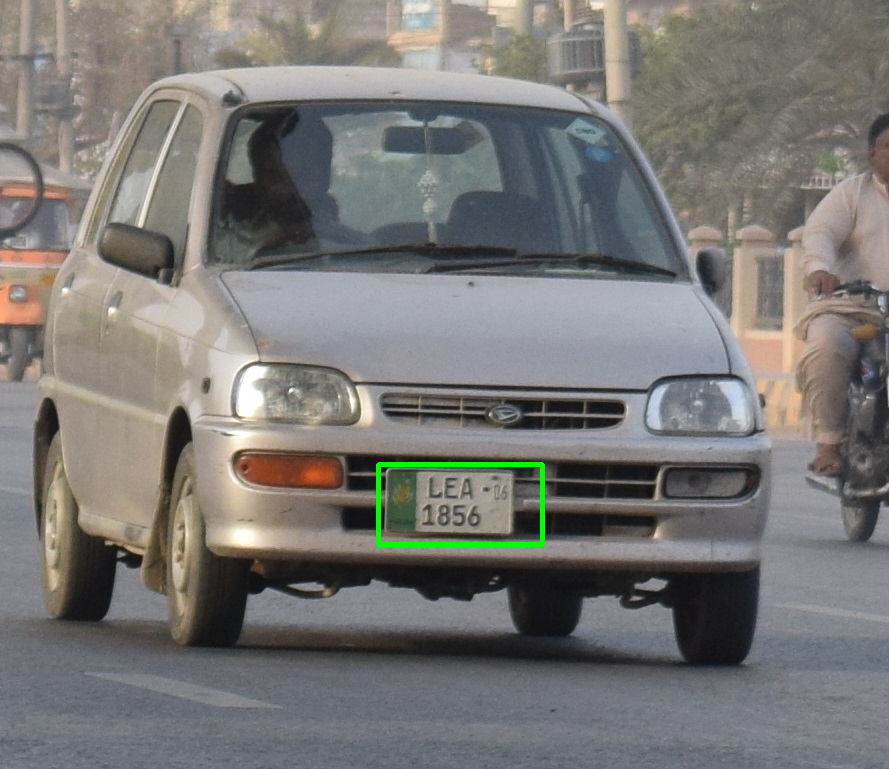

In [ ]:
#378	542	464	544
cv2.rectangle(img,(378,464),(542,544),(0,255,0),3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
label=df.iloc[:,1:].values

In [ ]:
data=[]
out=[]
for i in range(len(image_path)):
  image=image_path[i]
  image_arr=cv2.imread(image)
  h,w,d=image_arr.shape
  load_image=load_img(image,target_size=(224,224))
  load_image_arr=img_to_array(load_image)
  norm_load_image_arr=load_image_arr/255.0
  xmin,xmax,ymin,ymax=label[i]
  nxmin,nxmax=xmin/w,xmax/w
  nymin,nymax=ymin/h,ymax/h
  label_norm=(nxmin,nxmax,nymin,nymax)
  data.append(norm_load_image_arr)
  out.append(label_norm)

In [ ]:
data

[array([[[0.5529412 , 0.5176471 , 0.4509804 ],
         [0.5411765 , 0.5137255 , 0.4509804 ],
         [0.5647059 , 0.53333336, 0.48235294],
         ...,
         [0.4       , 0.4117647 , 0.3764706 ],
         [0.3529412 , 0.35686275, 0.3254902 ],
         [0.35686275, 0.36078432, 0.3372549 ]],
 
        [[0.5372549 , 0.5019608 , 0.43529412],
         [0.5882353 , 0.5529412 , 0.4862745 ],
         [0.6156863 , 0.5803922 , 0.52156866],
         ...,
         [0.39215687, 0.39607844, 0.37254903],
         [0.40392157, 0.4       , 0.38039216],
         [0.41568628, 0.4117647 , 0.39215687]],
 
        [[0.5764706 , 0.5294118 , 0.46666667],
         [0.58431375, 0.54901963, 0.48235294],
         [0.6392157 , 0.6039216 , 0.54509807],
         ...,
         [0.44313726, 0.4392157 , 0.41960785],
         [0.43137255, 0.42745098, 0.40784314],
         [0.37254903, 0.36862746, 0.34901962]],
 
        ...,
 
        [[0.41960785, 0.43529412, 0.47058824],
         [0.44313726, 0.45882353, 0.49411

In [ ]:
out

[(0.4251968503937008,
  0.609673790776153,
  0.6033810143042913,
  0.7074122236671001),
 (0.6363636363636364,
  0.7541501976284585,
  0.6276958002270148,
  0.713961407491487),
 (0.41509433962264153,
  0.5680775114737379,
  0.640531561461794,
  0.7335548172757476),
 (0.4315443592552026,
  0.6100766703176341,
  0.6854741896758704,
  0.7503001200480192),
 (0.517990495587237,
  0.6687033265444671,
  0.6439326837909655,
  0.7387068201948627),
 (0.5258552108194113,
  0.6618933969769292,
  0.6201214223764093,
  0.6903729401561145),
 (0.4473942969518191,
  0.6066863323500492,
  0.6699239956568946,
  0.755700325732899),
 (0.5306122448979592,
  0.6488095238095238,
  0.6881188118811881,
  0.780940594059406),
 (0.4921946740128558,
  0.610651974288338,
  0.5930087390761548,
  0.6791510611735331),
 (0.5626834381551362,
  0.6955974842767295,
  0.643655489809336,
  0.7527942143326759),
 (0.4861773117254528,
  0.6348903717826502,
  0.6069221260815822,
  0.6872682323856613),
 (0.5724258289703316,
  0.70

In [ ]:
x=np.array(data,dtype=np.float32)
y=np.array(out,dtype=np.float32)

In [ ]:
x.shape,y.shape

((104, 224, 224, 3), (104, 4))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((93, 224, 224, 3), (11, 224, 224, 3), (93, 4), (11, 4))

##Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Model

In [ ]:
inc_res=InceptionResNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
inc_res.trainable=False
mdl=inc_res.output
mdl=Flatten()(mdl)
mdl=Dense(500,activation='relu')(mdl)
mdl=Dense(4,activation='sigmoid')(mdl)
model=Model(inputs=inc_res.input,outputs=mdl)

In [ ]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

##Training of Model


In [ ]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test))

In [ ]:
model.save('/content/drive/My Drive/Numer_Plate_model/obj_detect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model=tf.keras.models.load_model('/content/drive/My Drive/Numer_Plate_model/obj_detect.h5')
print('done')

done


In [ ]:
image=load_img('/content/drive/My Drive/testplate.jpg')
image=np.array(image,dtype=np.uint8)
image1=load_img('/content/drive/My Drive/testplate.jpg',target_size=(224,224))
new_image1=img_to_array(image1)/255.0

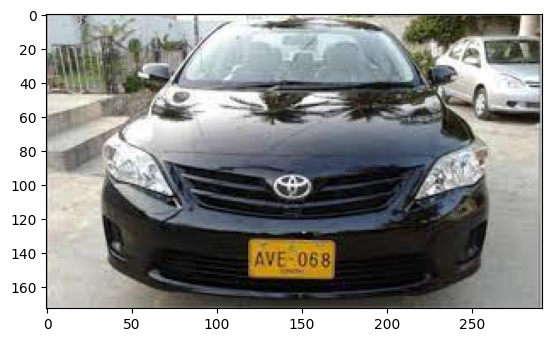

In [ ]:
h,w,d=image.shape
plt.imshow(image)
plt.show()

In [ ]:
check=new_image1.reshape(1,224,224,3)
check.shape

(1, 224, 224, 3)

In [ ]:
dimens=model.predict(check)
dimens

1/1 [==============================] - 3s 3s/step


array([[1., 1., 1., 1.]], dtype=float32)

In [ ]:
denorm=np.array([w,w,h,h])
dimens=dimens*denorm
dimens=dimens.astype(np.int32)
dimens

array([[292, 292, 173, 173]], dtype=int32)

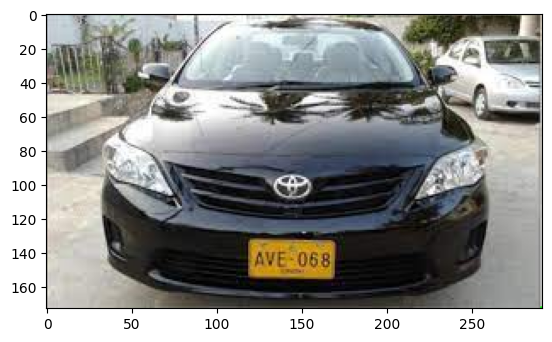

In [ ]:
xmin,xmax,ymin,ymax=dimens[0]
p1=(xmin,ymin)
p2=(xmax,ymax)
cv2.rectangle(image,p1,p2,(0,255,0),3)
plt.imshow(image)
plt.show()